# Features - Calculus
Documentation Link: https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
x, y, z = sp.symbols('x y z')

## [Derivatives](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#derivatives)

In [3]:
display(sp.diff(sp.cos(x), x))
display(sp.diff(sp.exp(x**2), x))

display(sp.diff(x**4, x, x, x), sp.diff(x**4, x, 3))

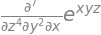

In [4]:
expr = sp.exp(x*y*z)

deriv = sp.Derivative(expr, x, y, y, z, 4)
display(deriv, deriv.doit())

display(sp.diff(expr, x, y, y, z, z, z, z), sp.diff(expr, x, y, 2, z, 4), 
        expr.diff(x, y, y, z, 4))

In [5]:
m, n, a, b = sp.symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n))

## [Integrals](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#integrals)

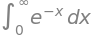

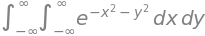

'unable to perform'

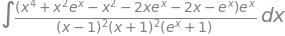

In [6]:
display(sp.Integral(sp.cos(x), x), sp.integrate(sp.cos(x), x))
display(sp.Integral(sp.exp(-x), (x, 0, sp.oo)), sp.integrate(sp.exp(-x), (x, 0, sp.oo)))

intg1 = sp.Integral(sp.exp(-x**2 - y**2), (x, -sp.oo, sp.oo), (y, -sp.oo, sp.oo))
display(intg1, intg1.doit())

intg2 =sp.Integral(x**x, x)
display(intg2, 'unable to perform', intg2.doit())

intg3 = sp.Integral(sp.log(x)**2, x)
display(intg3, intg3.doit())

intg4 = sp.Integral((x**4 + x**2*sp.exp(x) - x**2 - 2*x*sp.exp(x) - 2*x -
    sp.exp(x))*sp.exp(x)/((x - 1)**2*(x + 1)**2*(sp.exp(x) + 1)), x)
display(intg4, intg4.doit())

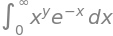

⎧ Γ(y + 1)    for re(y) > -1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

In [7]:
intg = sp.Integral(x**y*sp.exp(-x), (x, 0, sp.oo))
display(intg, intg.doit())

## [Limits](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#limits)

nan

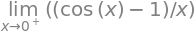

In [8]:
display(sp.limit(sp.sin(x)/x, x, 0))
expr = x**2/sp.exp(x)
display(expr, expr.subs(x, sp.oo), sp.limit(expr, x, sp.oo))
lim1 = sp.Limit((sp.cos(x) - 1)/x, x, 0) # '+' is default
display(lim1, lim1.doit())

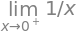

In [9]:
lim2rhs = sp.Limit(1/x, x, 0, '+')
lim2lhs = sp.Limit(1/x, x, 0, dir='-')
display(lim2rhs, lim2rhs.doit(), lim2lhs, lim2lhs.doit())

## [Series Expansion](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#series-expansion)

In [10]:
expr = sp.exp(sp.sin(x))
expr.series(x, 0, 4)
expr.series(x, 0, 4).removeO()

The $O\left(x^4\right)$ term at the end represents the Landau order term at $x=0$ (not to be confused with big O notation used in computer science, which generally represents the Landau order term at $x$ where $x \rightarrow \infty$). It means that all x terms with power greater than or equal to $x^4$ are omitted.

In [11]:
display(x +x**3 +x**6 + sp.O(x**4), x*sp.O(1))

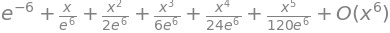

'about a point'

In [12]:
expr1 = sp.exp(x-6)
display(expr1, expr1.series(x), 'about a point', expr1.series(x, x0=6))

## [Finite Differences](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#finite-differences)

In [13]:
f, g = sp.symbols('f g', cls=sp.Function)
sp.differentiate_finite(f(x)*g(x))

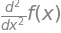

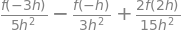

In [14]:
f = sp.Function('f')
dfdx = f(x).diff(x)
display(dfdx, dfdx.as_finite_difference())

d2fdx2 = f(x).diff(x, 2)
h = sp.Symbol('h')
display(d2fdx2, d2fdx2.as_finite_difference(), d2fdx2.as_finite_difference([-3*h,-h,2*h]),
        sp.finite_diff_weights(2, [-3,-1,2], 0), sp.finite_diff_weights(2, [-3,-1,2], 0)[-1][-1])


We only need the last element in the last sublist returned from finite_diff_weights. The reason for this is that the function also generates weights for lower derivatives and using fewer points.

In [15]:
xlist = [-3, 1, 2]
ylist = sp.symbols('a b c')
display(sp.apply_finite_diff(1, xlist, ylist, 0), 
        sp.apply_finite_diff(1, xlist, ylist, 5))